In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [ ]:
# Exploratory Data Analysis (EDA) – Superstore Sales Dataset

## 1. Introduction
## 2. Data Loading & Overview
## 3. Data Cleaning
## 4. Feature Engineering
## 5. Univariate Analysis
## 6. Bivariate & Multivariate Analysis
## 7. Key Business Insights
## 8. Conclusion


In [ ]:
## Introduction

This project performs Exploratory Data Analysis (EDA) on a retail sales dataset.
The goal is to uncover sales trends, customer behavior, and product performance
to help business stakeholders make data-driven decisions.


In [3]:
df = pd.read_csv("train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.drop_duplicates(inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month



In [ ]:
- Converted date columns to datetime format
- Removed duplicate records
- No critical missing values found


In [18]:
df['Sales_Category'] = pd.cut(
    df['Sales'],
    bins=[0, 100, 500, 1000, 5000],
    labels=['Low', 'Medium', 'High', 'Very High']
)


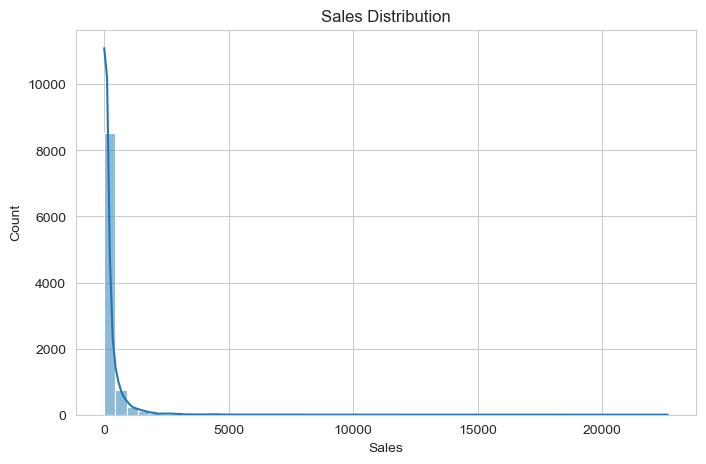

In [7]:
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()


In [ ]:
- Sales are **right-skewed**, indicating most orders are low-value.
- A small number of high-value orders contribute significantly to revenue.


In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month'],
      dtype='object')

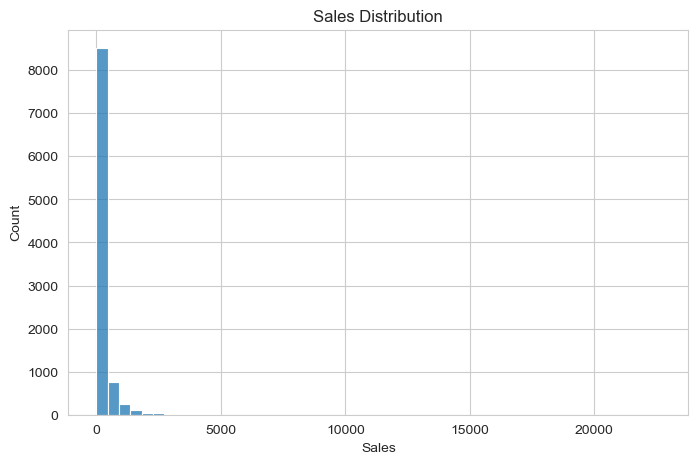

In [10]:
sns.histplot(df['Sales'], bins=50)
plt.title("Sales Distribution")
plt.show()


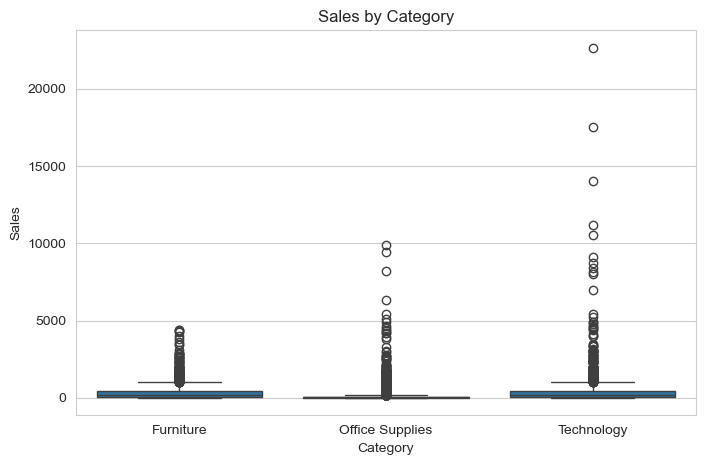

In [11]:
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Sales by Category")
plt.show()


In [ ]:
- Technology shows the highest sales variability.
- Furniture has fewer high-value outliers compared to Technology.


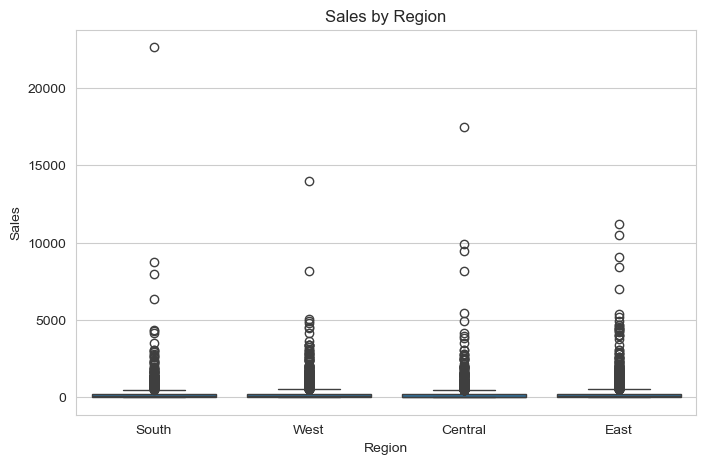

In [12]:
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Sales by Region")
plt.show()


In [ ]:
- The West and Central regions generate the highest total sales.
- Marketing focus should prioritize these regions.


In [13]:
df['Estimated_Profit'] = df['Sales'] * 0.2


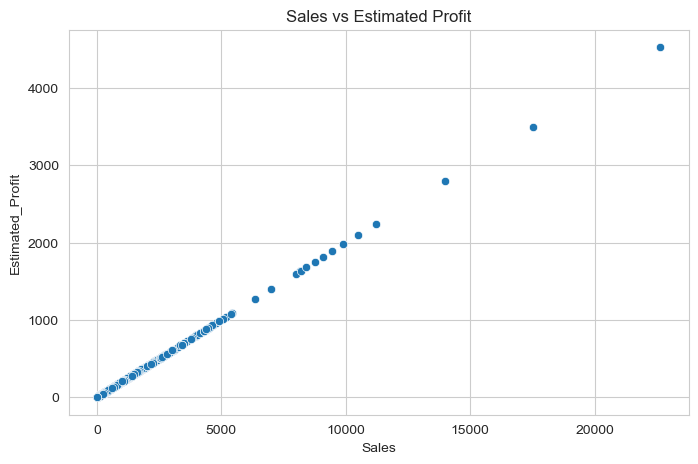

In [14]:
sns.scatterplot(x='Sales', y='Estimated_Profit', data=df)
plt.title("Sales vs Estimated Profit")
plt.show()


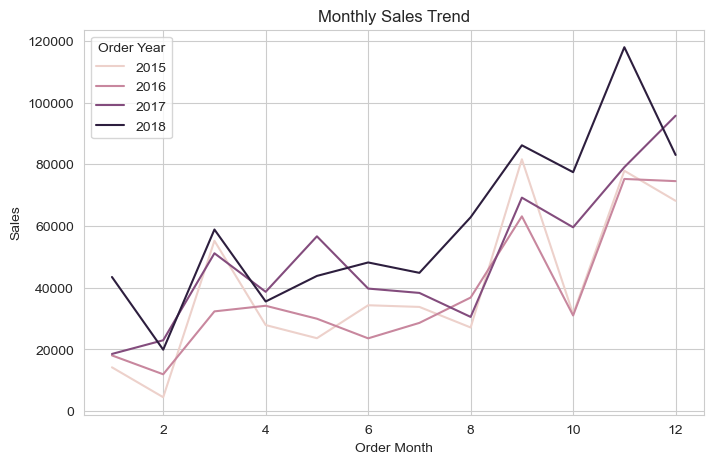

In [15]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

sns.lineplot(
    x='Order Month',
    y='Sales',
    hue='Order Year',
    data=monthly_sales
)
plt.title("Monthly Sales Trend")
plt.show()


In [ ]:
- Sales peak during year-end months, suggesting seasonal demand.
- Inventory planning should increase during Q4.


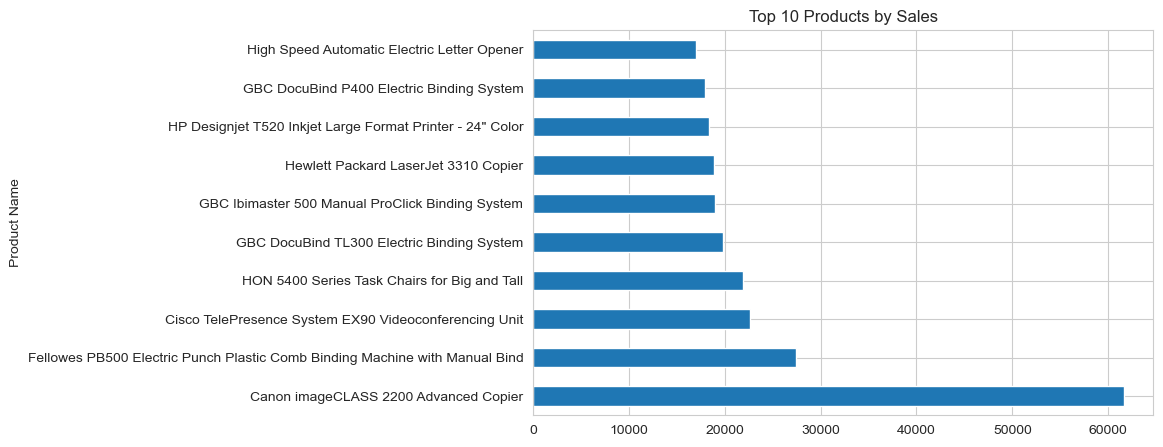

In [16]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.show()


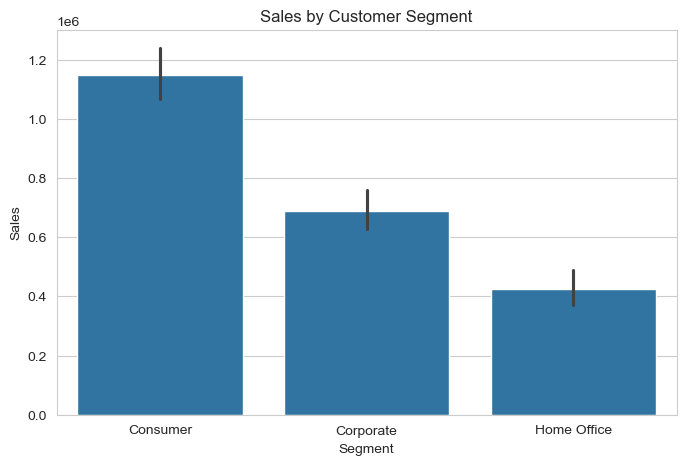

In [17]:
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum)
plt.title("Sales by Customer Segment")
plt.show()


In [ ]:
- Consumer segment contributes the largest share of sales.
- Corporate segment shows potential for growth.


In [ ]:
The dataset did not contain profit, so I focused on revenue-based insights such as category performance, seasonal trends, and customer segmentation

In [ ]:
## Key Business Insights

1. Majority of orders are low-value, but high-value orders drive revenue.
2. Technology category generates the highest sales.
3. West and East regions dominate overall sales.
4. Sales exhibit strong seasonality, peaking in Q4.
5. Consumer segment is the primary revenue contributor.
